In [73]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('..')
print(sys.path)  # 打印当前工作目录

['/Users/liudongdong/Documents/ddliu代码库/PySoilPhysics/tests', '/opt/anaconda3/envs/ldd22/lib/python39.zip', '/opt/anaconda3/envs/ldd22/lib/python3.9', '/opt/anaconda3/envs/ldd22/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/ldd22/lib/python3.9/site-packages', '..', '..', '..', '..', '..', '..', '..', '..', '..']


In [74]:
from PYSOILPHYSICS.utils import SWRC_Data
from PYSOILPHYSICS.SWRC import vanGenuchten, BrooksCorey, Durner
from PYSOILPHYSICS.SWRC import GroeneveltGrant, Dexter, ModifiedvanGenuchten

In [75]:
# 从CSV文件中读取数据
file_path = "SWRC_example1.csv"  # 使用相对路径访问swrc文件夹中的文件
df = pd.read_csv(file_path)

# 将DataFrame列转换为numpy数组
pressure_head = df['pressure_head'].values
water_content = df['water_content'].values

# 使用读取的数据创建SWRC_Data对象
data = SWRC_Data(pressure_head, water_content)

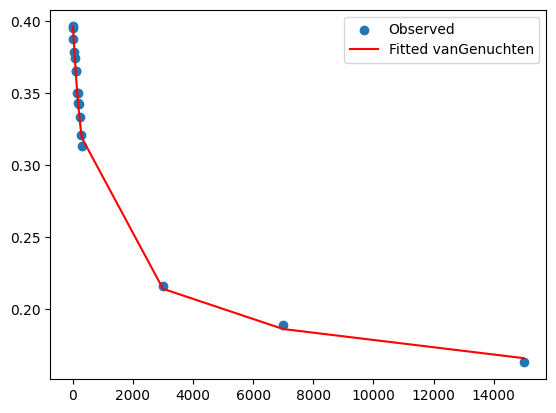

Error Metrics for vanGenuchten Model:
MSE: 8.190753312028458e-06, RMSE: 0.002861949215487315, MAE: 0.0024486105102794003, R^2: 0.9982750981128564, NSE: 0.9982750981128564
fitted parameters: {'theta_r': (0.08121565709874289, 0.02707614794005356), 'theta_s': (0.3962913478734337, 0.002071046894531976), 'alpha': (0.007043434834484943, 0.0007047462044454854), 'n': (1.2815961407722745, 0.049531110220518516)}


In [76]:
# Example for vanGenuchten
param_bounds_vanGenuchten= {
    'theta_r': (0, 0.6),
    'theta_s': (0, 1),
    'alpha': (0, 2),
    'n': (1, 4)
}
model_vanGenuchten = vanGenuchten(param_bounds=param_bounds_vanGenuchten)
fitted_params_model_vanGenuchten = model_vanGenuchten.fit(data)
model_vanGenuchten.plot(data)
print(f"fitted parameters: {fitted_params_model_vanGenuchten}")

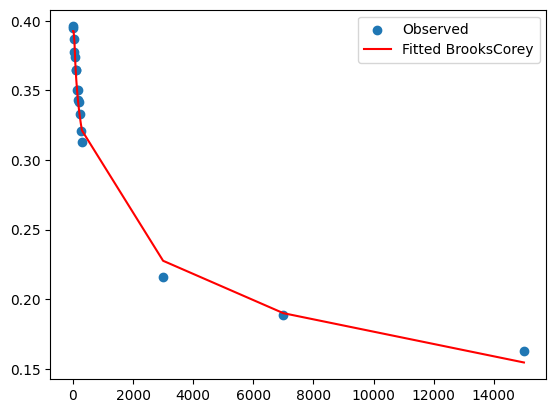

Error Metrics for BrooksCorey Model:
MSE: 2.9658404152421402e-05, RMSE: 0.005445953006813537, MAE: 0.004499590650580467, R^2: 0.9937541963060892, NSE: 0.9937541963060892
fitted parameters: {'theta_r': (0.9999999998226253, 0.49413997565295903), 'theta_s': (0.39266666646296344, 0.003595555912908131), 'lambda_': (0.056172579105240386, 0.03832642163096651), 'p_c': (41.53719588781166, 7.389501749899323)}


In [77]:
# Example for BrooksCorey
param_bounds_BrooksCorey = {
    'theta_r': (0, 1.0),
    'theta_s': (0, 1.0),
    'lambda_': (0, 2.0),
    'p_c':     (0, 100)
}
model_BrooksCorey = BrooksCorey(param_bounds=param_bounds_BrooksCorey)
fitted_params_model_BrooksCorey = model_BrooksCorey.fit(data)
model_BrooksCorey.plot(data)
print(f"fitted parameters: {fitted_params_model_BrooksCorey}")

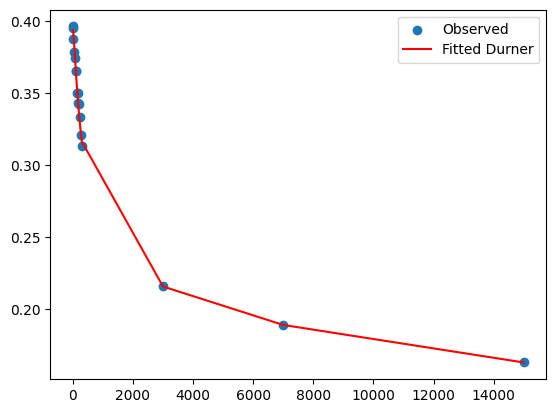

Error Metrics for Durner Model:
MSE: 5.454844414353828e-06, RMSE: 0.002335560835078767, MAE: 0.0019948583644600975, R^2: 0.9988512568910388, NSE: 0.9988512568910388
fitted parameters: {'theta_r': (0.13035983059056797, 0.5483242664089142), 'theta_s': (0.3940685505425904, 0.0023443948325864612), 'alpha1': (0.006136272950451902, 0.0021353203116643727), 'n1': (1.4653126621386785, 0.3547715741375525), 'alpha2': (0.00012523591650980535, 0.0009939643905018643), 'n2': (3.9999999999958464, 212.88645385170676), 'w1': (0.9082562262403157, 2.5855954194357538)}


In [78]:
# Example for Durner
param_bounds_Durner = {
    'theta_r': (0, 0.6),
    'theta_s': (0, 1),
    'alpha1': (0, 2),
    'n1':     (1, 4),
    'alpha2': (0, 2),
    'n2': (1, 4),
    'w1': (0, 1)
}
model_Durner = Durner(param_bounds=param_bounds_Durner)
fitted_params_model_Durner = model_Durner.fit(data)
model_Durner.plot(data)
print(f"fitted parameters: {fitted_params_model_Durner}")

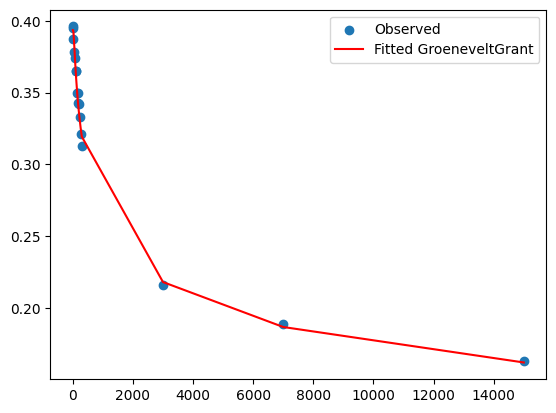

Error Metrics for GroeneveltGrant Model:
MSE: 1.0320483334633917e-05, RMSE: 0.003212550907710867, MAE: 0.002753173726904242, R^2: 0.9978265953689508, NSE: 0.9978265953689508
fitted parameters: {'x0': (9.99999999999986, 4.028952725625832), 'k0': (10.351274989569154, 1.4203183918056022), 'k1': (0.44375573423650677, 0.06408102380186301), 'n': (1.9352522079557688, 0.23495667564768483)}


In [79]:
# Example for GroeneveltGrant
param_bounds_GroeneveltGrant = {
    'x0': (5, 10),
    'k0': (0, 100),
    'k1': (0, 100),
    'n':  (1, 4),
}
model_GroeneveltGrant = GroeneveltGrant(param_bounds=param_bounds_GroeneveltGrant)
fitted_params_model_GroeneveltGrant = model_GroeneveltGrant.fit(data)
model_GroeneveltGrant.plot(data)
print(f"fitted parameters: {fitted_params_model_GroeneveltGrant}")

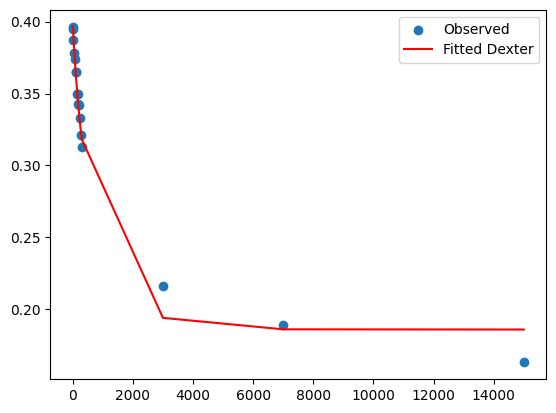

Error Metrics for Dexter Model:
MSE: 6.594576538216946e-05, RMSE: 0.008120699808647618, MAE: 0.004696491555827226, R^2: 0.9861123915196193, NSE: 0.9861123915196193
fitted parameters: {'theta_r': (0.18589692909595074, 0.006999168868594471), 'a1': (0.04920995776230027, 0.09580591095211166), 'p1': (205.96213537817357, 368.5044477283594), 'a2': (0.16310570319965262, 0.09610760899812625), 'p2': (999.9999999999847, 637.4240296354873)}


In [80]:
# Example for Dexter
param_bounds_Dexter = {
    'theta_r': (0, 1),
    'a1':(0, 1000),
    'p1': (0, 1000),
    'a2': (0, 1000),
    'p2':(0, 1000)
}
model_Dexter = Dexter(param_bounds=param_bounds_Dexter)
fitted_params_model_Dexter = model_Dexter.fit(data)
model_Dexter.plot(data)
print(f"fitted parameters: {fitted_params_model_Dexter}")

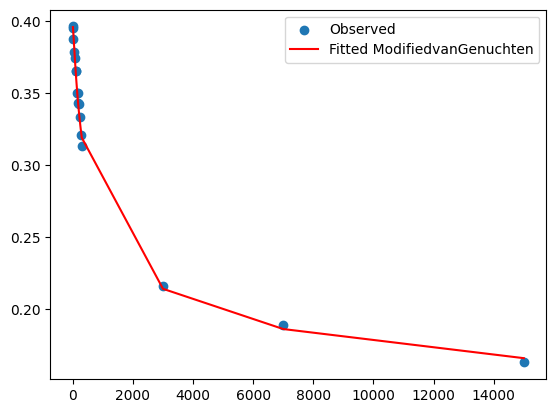

Error Metrics for ModifiedvanGenuchten Model:
MSE: 8.190753312000294e-06, RMSE: 0.002861949215482395, MAE: 0.002448611461849997, R^2: 0.9982750981128623, NSE: 0.9982750981128623
fitted parameters: {'theta_r': (0.07419157921194841, 0.09155521051427733), 'theta_s': (0.38926713195845486, 0.04658562135611197), 'alpha': (0.007043432647429545, 0.0009738995343821692), 'n': (1.2815963835280408, 0.15718118492361596), 'b0': (0.007024213618659273, 0.044998178493287), 'b1': (3.511707723060305e-31, 6.169260241402331e-06), 'b2': (1.1273812413971058e-33, 2.4226537306493897e-10)}


In [81]:
# Example for Dexter
param_bounds_ModifiedvanGenuchten = {
    'theta_r': (0, 0.6),
    'theta_s': (0, 1),
    'alpha': (0, 2),
    'n':     (1, 4),
    'b0': (0, 100),
    'b1': (0, 100),
    'b2': (0, 100)
}
model_ModifiedvanGenuchten =ModifiedvanGenuchten(param_bounds=param_bounds_ModifiedvanGenuchten)
fitted_params_model_ModifiedvanGenuchten = model_ModifiedvanGenuchten.fit(data)
model_ModifiedvanGenuchten.plot(data)
print(f"fitted parameters: {fitted_params_model_ModifiedvanGenuchten}")